## Q1. EDA

In [56]:
import numpy as np
import pandas as pd

In [57]:
df=pd.read_csv("Dataset.CSV")

In [58]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,2,01-01-2011,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
2,3,01-01-2011,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,?,0,5,27,32
3,4,01-01-2011,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13
4,5,01-01-2011,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   instant     17379 non-null  int64 
 1   dteday      17379 non-null  object
 2   season      17379 non-null  object
 3   yr          17379 non-null  object
 4   mnth        17379 non-null  object
 5   hr          17379 non-null  int64 
 6   holiday     17379 non-null  object
 7   weekday     17379 non-null  int64 
 8   workingday  17379 non-null  object
 9   weathersit  17379 non-null  object
 10  temp        17379 non-null  object
 11  atemp       17379 non-null  object
 12  hum         17379 non-null  object
 13  windspeed   17379 non-null  object
 14  casual      17379 non-null  object
 15  registered  17379 non-null  object
 16  cnt         17379 non-null  int64 
dtypes: int64(4), object(13)
memory usage: 2.3+ MB


In [60]:
df.describe()

,instant,hr,weekday,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000
mean,8690.0000,11.546752,3.003683,189.463088
std,5017.0295,6.914405,2.005771,181.387599
min,1.0000,0.000000,0.000000,1.000000
25%,4345.5000,6.000000,1.000000,40.000000
50%,8690.0000,12.000000,3.000000,142.000000
75%,13034.5000,18.000000,5.000000,281.000000
max,17379.0000,23.000000,6.000000,977.000000


In [61]:
df["dteday"] = pd.to_datetime(df["dteday"], format="%d-%m-%Y")

In [62]:
df.replace("?", np.nan, inplace=True)

In [63]:
df.isnull().sum()

instant        0
dteday         0
season         6
yr             1
mnth           1
hr             0
holiday        1
weekday        0
workingday     5
weathersit     4
temp          11
atemp          6
hum            6
windspeed      5
casual         1
registered     1
cnt            0
dtype: int64

In [64]:
num_col = ["temp","atemp","hum","windspeed","casual","registered"]
for col in num_col:
    df[col]=pd.to_numeric(df[col], errors='coerce')

In [65]:
df.isnull().sum()

instant        0
dteday         0
season         6
yr             1
mnth           1
hr             0
holiday        1
weekday        0
workingday     5
weathersit     4
temp          11
atemp          6
hum            6
windspeed      5
casual         1
registered     1
cnt            0
dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17373 non-null  object        
 3   yr          17378 non-null  object        
 4   mnth        17378 non-null  object        
 5   hr          17379 non-null  int64         
 6   holiday     17378 non-null  object        
 7   weekday     17379 non-null  int64         
 8   workingday  17374 non-null  object        
 9   weathersit  17375 non-null  object        
 10  temp        17368 non-null  float64       
 11  atemp       17373 non-null  float64       
 12  hum         17373 non-null  float64       
 13  windspeed   17374 non-null  float64       
 14  casual      17378 non-null  float64       
 15  registered  17378 non-null  float64       
 16  cnt         17379 non-

In [67]:
cat_cols = [
    'season', 'yr', 'mnth', 'holiday',
    'workingday', 'weathersit'
]

In [68]:
num_col = [
     'temp','atemp','hum',
     'windspeed', 'casual', 'registered'
]

In [69]:
for cat in cat_cols:
    df[cat].fillna(df[cat].mode()[0], inplace=True)

C:\Users\Kalyan Aaryan\AppData\Local\Temp\ipykernel_10808\1804614447.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[cat].fillna(df[cat].mode()[0], inplace=True)


In [70]:
for num in num_col:
    df[num].fillna(df[num].median(), inplace=True)

C:\Users\Kalyan Aaryan\AppData\Local\Temp\ipykernel_10808\2953471786.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[num].fillna(df[num].median(), inplace=True)
C:\Users\Kalyan Aaryan\AppData\Local\Temp\ipykernel_10808\2953471786.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [71]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  object        
 4   mnth        17379 non-null  object        
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  object        
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  object        
 9   weathersit  17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  float64       
 15  registered  17379 non-null  float64       
 16  cnt         17379 non-

In [73]:
df.duplicated().sum()


np.int64(0)

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

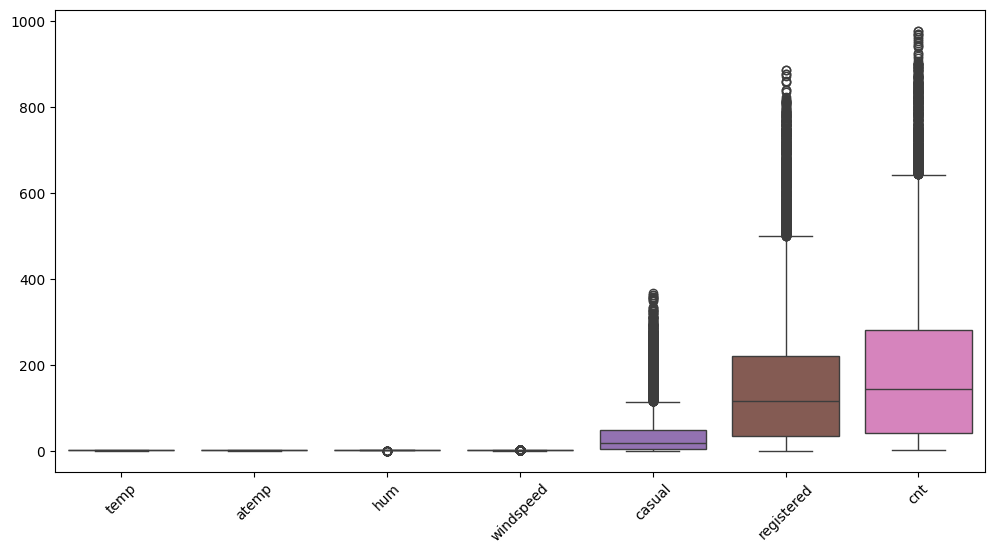

In [75]:
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45)
plt.show()

In [76]:
outlier_summary = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_summary[col] = outliers.shape[0]

outlier_summary

{'temp': 0,
 'atemp': 0,
 'hum': 22,
 'windspeed': 341,
 'casual': 1192,
 'registered': 680,
 'cnt': 505}

In [77]:
Q1 = df['cnt'].quantile(0.25)
Q3 = df['cnt'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['cnt'] < Q1 - 1.5*IQR) | (df['cnt'] > Q3 + 1.5*IQR)]
outliers.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
5536,5537,2011-08-23,fall,2011,8,14,No,2,Working Day,Clear,0.72,0.6515,0.30,0.0896,149.0,502.0,651
10358,10359,2012-03-12,springer,2012,3,17,No,1,Working Day,Mist,0.62,0.6212,0.38,0.4179,87.0,557.0,644
10359,10360,2012-03-12,springer,2012,3,18,No,1,Working Day,Mist,0.60,0.6212,0.43,0.1940,89.0,623.0,712
10382,10383,2012-03-13,springer,2012,3,17,No,2,Working Day,Clear,0.70,0.6364,0.37,0.1045,62.0,614.0,676
10383,10384,2012-03-13,springer,2012,3,18,No,2,Working Day,Clear,0.70,0.6364,0.34,0.2985,96.0,638.0,734


In [78]:
df_clean = df.copy()

for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

In [79]:
outlier_summary = {}

num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df_clean[(df_clean[col] < lower) | (df_clean[col] > upper)]
    outlier_summary[col] = outliers.shape[0]

outlier_summary


{'temp': 0,
 'atemp': 0,
 'hum': 0,
 'windspeed': 0,
 'casual': 571,
 'registered': 201,
 'cnt': 1}

In [80]:
print("Before:", df.shape)
print("After :", df_clean.shape)

Before: (17379, 17)
After : (14934, 17)


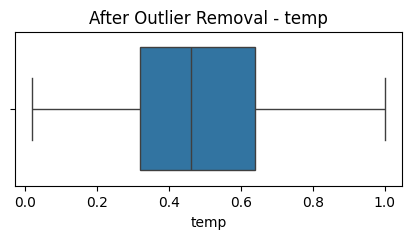

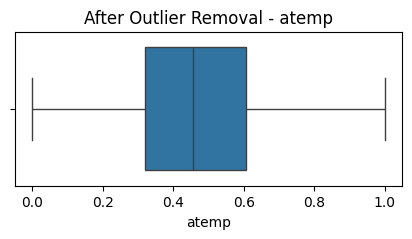

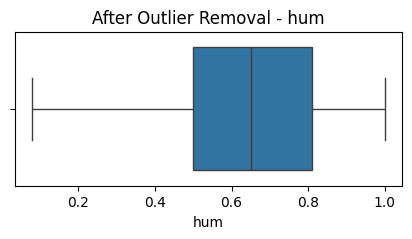

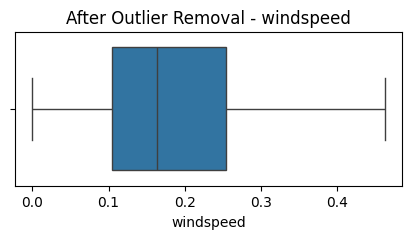

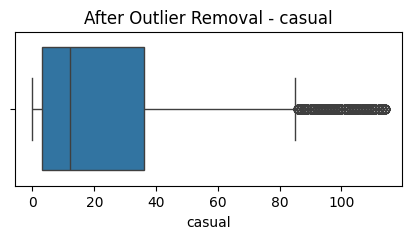

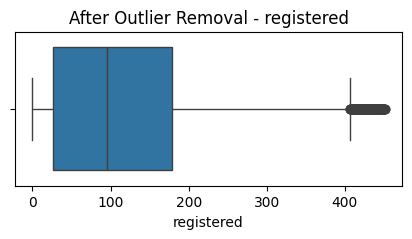

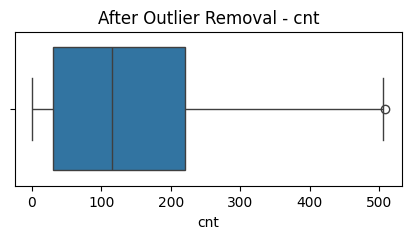

In [81]:
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
for col in num_cols:
    plt.figure(figsize=(5,2))
    sns.boxplot(x=df_clean[col])
    plt.title(f'After Outlier Removal - {col}')
    plt.show()

In [82]:
df.to_csv("cleaned_dataset1.csv", index=False)

## Q2.Data Visualization:

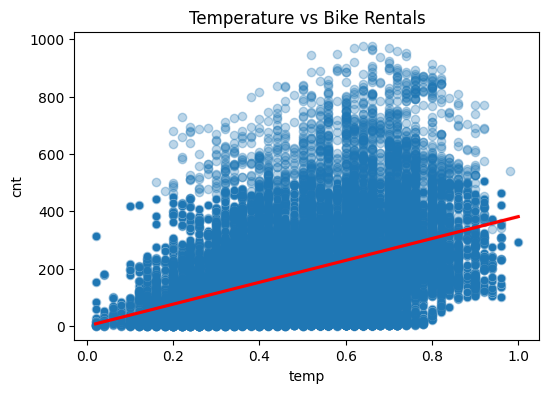

In [83]:
## Scattle plot Temperature vs Bike Rentals
plt.figure(figsize=(6,4))
sns.scatterplot(x='temp', y='cnt', data=df_clean)
sns.regplot(
    x=df['temp'],
    y=df['cnt'],
    scatter_kws={'alpha':0.3},
    line_kws={'color':'red'}
)
plt.title("Temperature vs Bike Rentals")
plt.show()

1) Each dot represents the number of bike rentals at a specific temperature.

2) The red line shows the overall trend between temperature and rentals.

3) As temperature increases, bike rentals increase.

4) Very low rentals are seen during cold weather.

5) Warmer weather encourages people to go outside and use bikes.

6) This shows a positive correlation between temperature and bike rentals.

7) Temperature is an important feature for predicting bike demand.

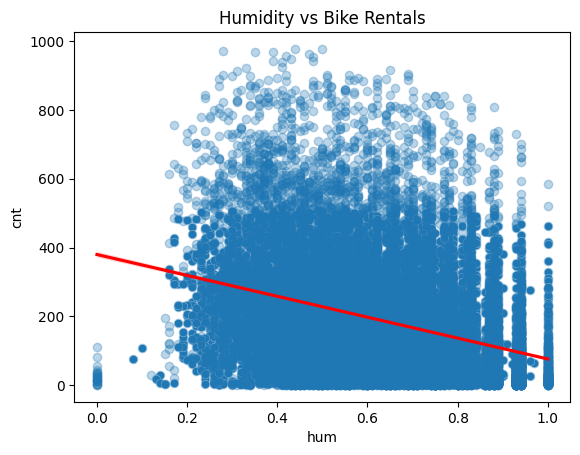

In [84]:
## Scattle plot Humidity vs Bike Rentals
sns.scatterplot(x='hum', y='cnt', data=df_clean)
sns.regplot(
    x=df['hum'],
    y=df['cnt'],
    scatter_kws={'alpha':0.3},
    line_kws={'color':'red'}
)
plt.title("Humidity vs Bike Rentals")
plt.show()

1) Each dot represents bike rentals at a certain humidity level.

2) The red line slopes downward, showing the trend.

3) As humidity increases, bike rentals decrease.

4) High humidity makes weather uncomfortable for cycling.

5) People avoid biking when air feels sticky or heavy.

6) This shows a negative correlation between humidity and bike rentals.

7) Humidity impacts user comfort and riding decisions.

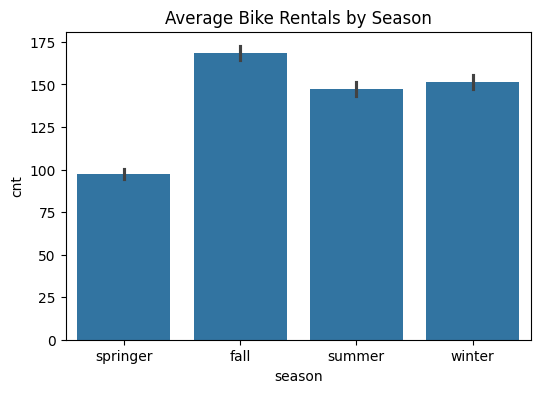

In [85]:
#Bar Plot Season vs Average Rentals
plt.figure(figsize=(6,4))
sns.barplot(x='season', y='cnt', data=df_clean)
plt.title("Average Bike Rentals by Season")
plt.show()


1) The bar plot shows that bike rentals change by season.
2) Bike rentals are highest in the fall season, followed by summer and winter.
3) The lowest number of bike rentals occurs in the spring season.
4) This means people prefer to rent bikes more during pleasant and stable weather, especially in fall.
Season is an important factor affecting bike rental demand.

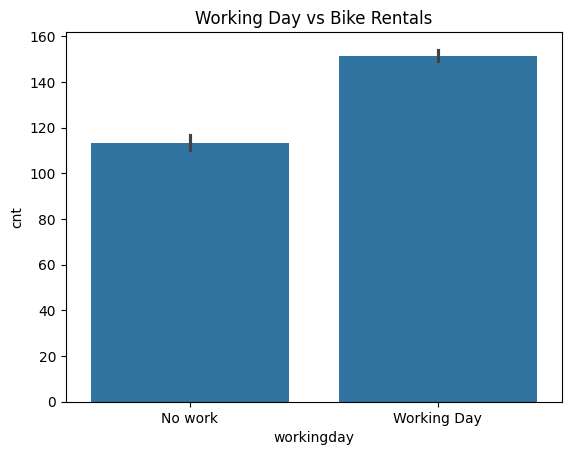

In [86]:
#Bar Plot Working Day vs Rentals
sns.barplot(x='workingday', y='cnt', data=df_clean)
plt.title("Working Day vs Bike Rentals")
plt.show()

1) The bar plot shows that bike rentals are slightly higher on working days compared to non-working days.
2) This suggests that many people use bikes for daily commuting, such as going to work or college.
3) The difference is not very large, which means bikes are used on both working and non-working days, but working days have a little more demand.

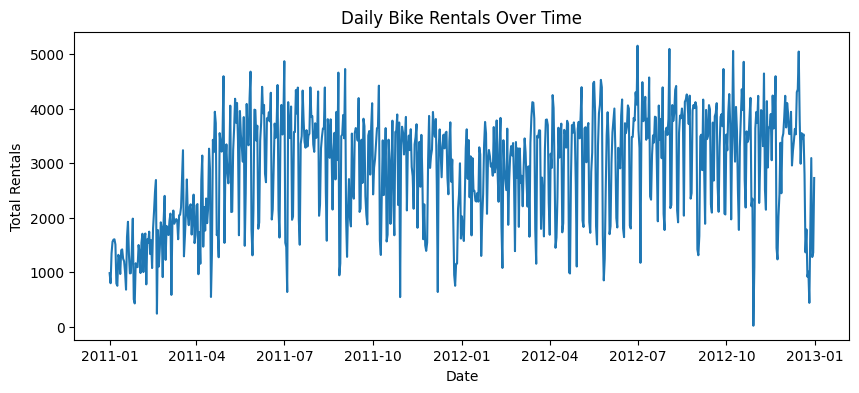

In [87]:
#Line Plots Daily Rentals Trend
daily_cnt = df_clean.groupby('dteday')['cnt'].sum()

plt.figure(figsize=(10,4))
plt.plot(daily_cnt)
plt.title("Daily Bike Rentals Over Time")
plt.xlabel("Date")
plt.ylabel("Total Rentals")
plt.show()

1) The line plot shows how daily bike rentals change over time.
2) Overall, there is an upward trend, which means bike rentals increase as time passes.
3) Bike rentals are lower at the beginning, then gradually increase during warmer months, and decrease during colder periods.
4) The repeated ups and downs show a seasonal pattern, where rentals go up in certain months and down in others.
5) This indicates that time and season strongly affect bike rental demand.

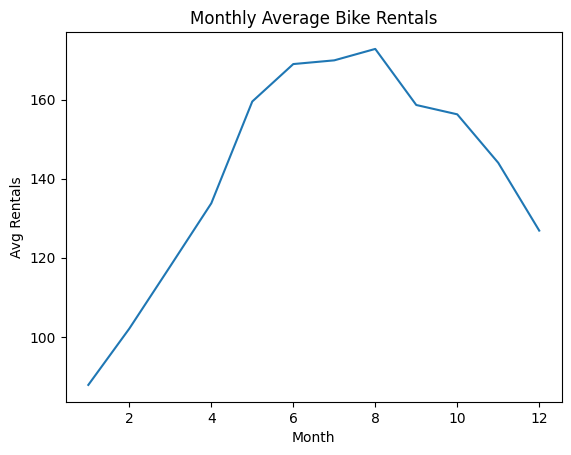

In [88]:
#Line Plot Monthly Seasonality
monthly_cnt = df_clean.groupby(df['dteday'].dt.month)['cnt'].mean()

sns.lineplot(x=monthly_cnt.index, y=monthly_cnt.values)
plt.title("Monthly Average Bike Rentals")
plt.xlabel("Month")
plt.ylabel("Avg Rentals")
plt.show()

1) The line plot shows the average number of bike rentals for each month.
2) Bike rentals are lowest at the beginning of the year (January–February).
3) They increase steadily from March and reach the highest level around June to September.
4) After October, bike rentals start decreasing toward the end of the year.
5) This pattern shows that bike rentals are high during warm months and low during cold months, indicating a clear seasonal effect.

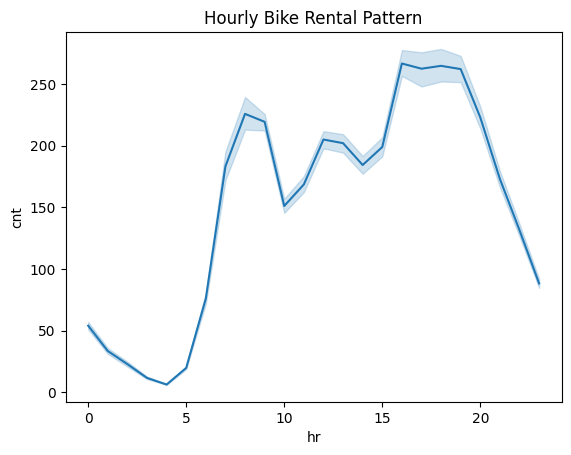

In [89]:
#Line Plot Hourly Usage Pattern
sns.lineplot(x='hr', y='cnt', data=df_clean)
plt.title("Hourly Bike Rental Pattern")
plt.show()

1) The line plot shows how bike rentals change throughout the day.
2) Bike rentals are very low during late night and early morning hours.
3) There is a first peak in the morning (around 8–9 AM), which indicates people using bikes for office or college travel.
4) Rentals decrease slightly during the afternoon and then reach the highest peak in the evening (around 5–7 PM).
5) After evening hours, bike rentals gradually decrease.
6) This shows that bike rentals follow a daily commuting pattern.

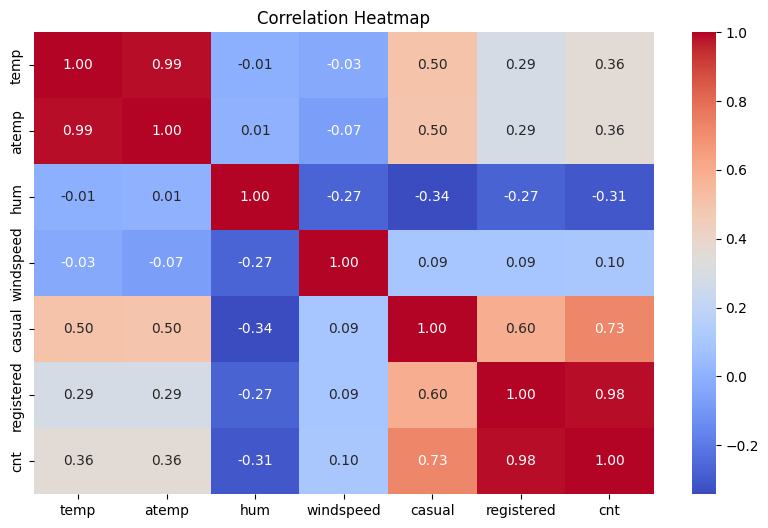

In [90]:
num_cols = ['temp','atemp','hum','windspeed','casual','registered','cnt']

plt.figure(figsize=(10,6))
sns.heatmap(df_clean[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# The correlation heatmap shows how different features are related to bike rentals (cnt).
1) Temperature (temp) and feeling temperature (atemp) have a moderate positive relationship with total rentals, which means rentals increase when the weather is warm.
2) Humidity (hum) has a negative relationship with bike rentals, so higher humidity leads to fewer rentals.
3) Windspeed has very little effect on bike rentals.
4) Registered users have a very strong positive correlation with total rentals, meaning most bike rentals come from registered users.
5) Casual users also show a positive relationship, but less than registered users.
6) temp and atemp are highly correlated with each other, which means they carry similar information.
7) Overall, registered users and temperature are the most important factors affecting bike rentals.

## Q3. Feature Engineering

In [91]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14934 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     14934 non-null  int64         
 1   dteday      14934 non-null  datetime64[ns]
 2   season      14934 non-null  object        
 3   yr          14934 non-null  object        
 4   mnth        14934 non-null  object        
 5   hr          14934 non-null  int64         
 6   holiday     14934 non-null  object        
 7   weekday     14934 non-null  int64         
 8   workingday  14934 non-null  object        
 9   weathersit  14934 non-null  object        
 10  temp        14934 non-null  float64       
 11  atemp       14934 non-null  float64       
 12  hum         14934 non-null  float64       
 13  windspeed   14934 non-null  float64       
 14  casual      14934 non-null  float64       
 15  registered  14934 non-null  float64       
 16  cnt         14934 non-null 

In [92]:
df_clean['day'] = df_clean['dteday'].dt.day
df_clean['month'] = df_clean['dteday'].dt.month
df_clean['year'] = df_clean['dteday'].dt.year

In [93]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0.0,3.0,13.0,16
1,2,2011-01-01,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.80,0.0,8.0,32.0,40
2,3,2011-01-01,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,0.63,0.0,5.0,27.0,32
3,4,2011-01-01,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0.0,3.0,10.0,13
4,5,2011-01-01,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0.0,0.0,1.0,1


In [94]:
df_clean.drop(['casual', 'registered'], axis=1, inplace=True)

In [95]:
df_clean.drop(['instant', 'dteday', 'yr','mnth'], axis=1, inplace=True)

In [96]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14934 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      14934 non-null  object 
 1   hr          14934 non-null  int64  
 2   holiday     14934 non-null  object 
 3   weekday     14934 non-null  int64  
 4   workingday  14934 non-null  object 
 5   weathersit  14934 non-null  object 
 6   temp        14934 non-null  float64
 7   atemp       14934 non-null  float64
 8   hum         14934 non-null  float64
 9   windspeed   14934 non-null  float64
 10  cnt         14934 non-null  int64  
 11  day         14934 non-null  int32  
 12  month       14934 non-null  int32  
 13  year        14934 non-null  int32  
dtypes: float64(4), int32(3), int64(3), object(4)
memory usage: 1.5+ MB


In [97]:
#Domain Knowledge
df_clean['is_peak_hour'] = df_clean['hr'].apply(
    lambda x: 1 if x in [7,8,9,17,18,19] else 0
)
## If hour is 7, 8, 9 (morning rush)
## OR 17, 18, 19 (evening rush)
## -> return 1 (peak hour)
## Otherwise
## ->return 0 (not a peak hour)

In [98]:
df_clean['is_weekend'] = df_clean['weekday'].apply(
    lambda x: 1 if x in [5,6] else 0
)

##If day is Saturday (5) or Sunday (6)
##-> return 1 (Weekend)
## Otherwise
## -> return 0 (Weekday)

In [99]:
df.drop(['hr', 'weekday'], axis=1, inplace=True)

In [100]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14934 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        14934 non-null  object 
 1   hr            14934 non-null  int64  
 2   holiday       14934 non-null  object 
 3   weekday       14934 non-null  int64  
 4   workingday    14934 non-null  object 
 5   weathersit    14934 non-null  object 
 6   temp          14934 non-null  float64
 7   atemp         14934 non-null  float64
 8   hum           14934 non-null  float64
 9   windspeed     14934 non-null  float64
 10  cnt           14934 non-null  int64  
 11  day           14934 non-null  int32  
 12  month         14934 non-null  int32  
 13  year          14934 non-null  int32  
 14  is_peak_hour  14934 non-null  int64  
 15  is_weekend    14934 non-null  int64  
dtypes: float64(4), int32(3), int64(5), object(4)
memory usage: 1.8+ MB


In [101]:
#Advanced but Simple
df_clean['weather_comfort'] = (
    (1 - df_clean['hum']) * df_clean['temp']
)

In [102]:
df.head()

,instant,dteday,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011,1,No,No work,Clear,0.24,0.2879,0.81,0.0,3.0,13.0,16
1,2,2011-01-01,springer,2011,1,No,No work,Clear,0.22,0.2727,0.80,0.0,8.0,32.0,40
2,3,2011-01-01,springer,2011,1,No,No work,Clear,0.22,0.2727,0.63,0.0,5.0,27.0,32
3,4,2011-01-01,springer,2011,1,No,No work,Clear,0.24,0.2879,0.75,0.0,3.0,10.0,13
4,5,2011-01-01,springer,2011,1,No,No work,Clear,0.24,0.2879,0.75,0.0,0.0,1.0,1


In [103]:
df_clean.drop(columns=['hum', 'temp'], inplace=True)


In [104]:
df_clean['weathersit'].unique()

array(['Clear', 'Mist', 'Light Snow', 'Heavy Rain'], dtype=object)

In [105]:
#Encoding
season_map = {
    'springer': 1,
    'summer': 2,
    'fall': 3,
    'winter': 4
}
df_clean['season'] = df_clean['season'].map(season_map)


In [106]:
df_clean['holiday'] = df_clean['holiday'].map({'No': 0, 'Yes': 1})

In [107]:
df_clean = pd.get_dummies(df_clean, columns=['weathersit'], drop_first=True)

In [108]:
df_clean.tail()

,season,hr,holiday,weekday,workingday,atemp,windspeed,cnt,day,month,year,is_peak_hour,is_weekend,weather_comfort,weathersit_Heavy Rain,weathersit_Light Snow,weathersit_Mist
17374,1,19,0,1,Working Day,0.2576,0.1642,119,31,12,2012,1,0,0.1040,False,False,True
17375,1,20,0,1,Working Day,0.2576,0.1642,89,31,12,2012,0,0,0.1040,False,False,True
17376,1,21,0,1,Working Day,0.2576,0.1642,90,31,12,2012,0,0,0.2000,False,False,False
17377,1,22,0,1,Working Day,0.2727,0.1343,61,31,12,2012,0,0,0.1144,False,False,False
17378,1,23,0,1,Working Day,0.2727,0.1343,49,31,12,2012,0,0,0.0910,False,False,False


In [109]:
df.head()

,instant,dteday,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011,1,No,No work,Clear,0.24,0.2879,0.81,0.0,3.0,13.0,16
1,2,2011-01-01,springer,2011,1,No,No work,Clear,0.22,0.2727,0.80,0.0,8.0,32.0,40
2,3,2011-01-01,springer,2011,1,No,No work,Clear,0.22,0.2727,0.63,0.0,5.0,27.0,32
3,4,2011-01-01,springer,2011,1,No,No work,Clear,0.24,0.2879,0.75,0.0,3.0,10.0,13
4,5,2011-01-01,springer,2011,1,No,No work,Clear,0.24,0.2879,0.75,0.0,0.0,1.0,1


weathersit
Clear         11416
Mist           4541
Light Snow     1419
Heavy Rain        3
Name: count, dtype: int64


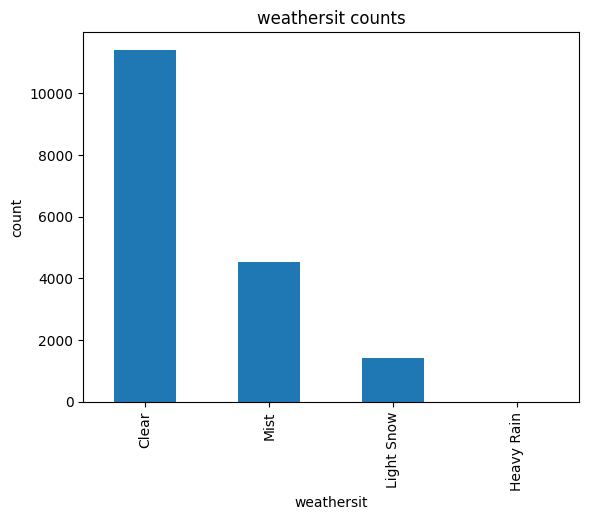

In [115]:
# show counts for weathersit and plot
counts = df.weathersit.value_counts(dropna=False)
print(counts)
ax = counts.plot(kind='bar')
ax.set_xlabel('weathersit')
ax.set_ylabel('count')
ax.set_title('weathersit counts')
plt.show()

In [116]:
dummy_cols = df_clean.select_dtypes(include='bool').columns
df_clean[dummy_cols] = df_clean[dummy_cols].astype(int)


In [117]:
df_clean['workingday'].unique()

array(['No work', 'Working Day'], dtype=object)

In [118]:
df_clean['workingday'] = df_clean['workingday'].map({
    'Working Day': 1,
    'No work': 0
})

In [119]:
df.head()

,instant,dteday,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011,1,No,No work,Clear,0.24,0.2879,0.81,0.0,3.0,13.0,16
1,2,2011-01-01,springer,2011,1,No,No work,Clear,0.22,0.2727,0.80,0.0,8.0,32.0,40
2,3,2011-01-01,springer,2011,1,No,No work,Clear,0.22,0.2727,0.63,0.0,5.0,27.0,32
3,4,2011-01-01,springer,2011,1,No,No work,Clear,0.24,0.2879,0.75,0.0,3.0,10.0,13
4,5,2011-01-01,springer,2011,1,No,No work,Clear,0.24,0.2879,0.75,0.0,0.0,1.0,1


In [120]:
df.to_csv("New_dataset1.csv", index=False)

In [121]:
#Scaling / Normalizing Numerical Features
from sklearn.preprocessing import StandardScaler
num_cols = ['weather_comfort', 'atemp', 'windspeed']
scaler = StandardScaler()
df_clean[num_cols] = scaler.fit_transform(df_clean[num_cols])

In [122]:
df_clean[num_cols]

,weather_comfort,atemp,windspeed
0,-1.001556,-1.013006,-1.606139
1,-1.014458,-1.102268,-1.606139
2,-0.712882,-1.102268,-1.606139
3,-0.885442,-1.013006,-1.606139
4,-0.885442,-1.013006,-1.606139
...,...,...,...
17374,-0.530647,-1.190942,-0.141683
17375,-0.530647,-1.190942,-0.141683
17376,0.243450,-1.190942,-0.141683
17377,-0.446786,-1.102268,-0.408353


In [123]:
#Bike usage drops sharply in bad weather
df_clean['bad_weather'] = df_clean[['weathersit_Mist', 'weathersit_Light Snow']].max(axis=1)
df_clean['bad_weather']

0        0
1        0
2        0
3        0
4        0
        ..
17374    1
17375    1
17376    0
17377    0
17378    0
Name: bad_weather, Length: 14934, dtype: int64

In [124]:
df_clean.isnull().sum()

season                   0
hr                       0
holiday                  0
weekday                  0
workingday               0
atemp                    0
windspeed                0
cnt                      0
day                      0
month                    0
year                     0
is_peak_hour             0
is_weekend               0
weather_comfort          0
weathersit_Heavy Rain    0
weathersit_Light Snow    0
weathersit_Mist          0
bad_weather              0
dtype: int64

In [125]:
# Target and features
X = df_clean.drop('cnt', axis=1)
y = df_clean['cnt']

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [127]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [128]:
# Randam ForestRegression
rf_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])

In [129]:
rf_pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2


In [130]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [131]:
y_pred = rf_pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [132]:
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 20.01083026447941
RMSE: 31.6223364655747
R2: 0.9314384763931871


In [133]:
# GradientBoostingRegression
from sklearn.ensemble import GradientBoostingRegressor

In [134]:
gb_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=5,
        random_state=42
    ))
])

In [135]:
gb_pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,loss,'squared_error'
,learning_rate,0.05
,n_estimators,200
,subsample,1.0


In [136]:
y_pred = gb_pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [137]:
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 22.56765622047782
RMSE: 34.27070269940715
R2: 0.9194735472671073


In [138]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV

In [139]:
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.05, 0.1]
}

In [140]:
grid = GridSearchCV(
    gb_pipeline,
    param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_

In [141]:
best_model

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,loss,'squared_error'
,learning_rate,0.1
,n_estimators,300
,subsample,1.0


In [142]:
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [143]:
y_pred

array([118.76130381, 233.89954054, 163.75875516, ..., 307.68029307,
       129.9196911 ,  13.70338433], shape=(2987,))

In [144]:
print("RMSE:", rmse)
print("R2:", r2)

RMSE: 27.510033363853513
R2: 0.9481110618169235


In [145]:
# XGBHOOST
from xgboost import XGBRegressor

In [146]:
xgb_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        random_state=42
    ))
])

In [147]:
xgb_pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None


In [148]:
y_pred = xgb_pipeline.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("xgb RMSE:", rmse)
print("xgb R2:", r2)

xgb RMSE: 29.75264747443967
xgb R2: 0.9393062591552734


In [149]:
!pip install lightgbm

     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
      --------------------------------------- 0.0/1.5 MB 445.2 kB/s eta 0:00:04
     - -------------------------------------- 0.1/1.5 MB 656.4 kB/s eta 0:00:03
     --- ------------------------------------ 0.1/1.5 MB 804.6 kB/s eta 0:00:02
     ----- ---------------------------------- 0.2/1.5 MB 985.7 kB/s eta 0:00:02
     ------- -------------------------------- 0.3/1.5 MB 1.3 MB/s eta 0:00:01
     ----------- ---------------------------- 0.4/1.5 MB 1.4 MB/s eta 0:00:01
     ------------- -------------------------- 0.5/1.5 MB 1.5 MB/s eta 0:00:01
     --------------- ------------------------ 0.6/1.5 MB 1.6 MB/s eta 0:00:01
     ------------------ --------------------- 0.7/1.5 MB 1.6 MB/s eta 0:00:01
     --------------------- ------------------ 0.8/1.5 MB 1.7 MB/s eta 0:00:01
     ----------------------- ---------------- 0.9/1.5 MB 1.7 MB/s eta 


[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: C:\Users\Kalyan Aaryan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [150]:
# LightBGM Regression
from lightgbm import LGBMRegressor

In [151]:
lgbm_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', LGBMRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=-1,
        random_state=42
    ))
])

In [152]:
lgbm_pipeline.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 442
[LightGBM] [Info] Number of data points in the train set: 11947, number of used features: 16
[LightGBM] [Info] Start training from score 140.837198


,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.05


In [153]:
y_pred = lgbm_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

C:\Users\Kalyan Aaryan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [154]:
print("LightGBM RMSE:", rmse)
print("LightGBM R2:", r2)

LightGBM RMSE: 28.380420572945205
LightGBM R2: 0.9447757020434002


In [155]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

In [157]:
dt_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(
        random_state=42
    ))
])

In [158]:
dt_pipeline.fit(X_train, y_train)


,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2


In [159]:
y_pred = dt_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [160]:
print("Decision Tree RMSE:", rmse)
print("Decision Tree R2:", r2)

Decision Tree RMSE: 44.638401365468724
Decision Tree R2: 0.8633814048528576


In [166]:
# Save the best model from GridSearchCV
import joblib
joblib.dump(best_model, 'best_model.pkl')
print('Best model saved as best_model.pkl')

Best model saved as best_model.pkl
